In [3]:
!pip install qiskit
!pip install pylatexenc

from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister, execute, BasicAer
import sys
import numpy as np
from qiskit.tools.visualization import plot_histogram

## Four types of Bell states

### Type 1: $\frac{\ket{00}+\ket{11}}{\sqrt{2}}$

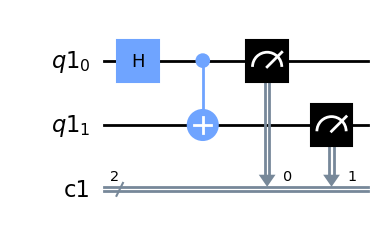

In [4]:
# Create the quantum registers and classical registers for measurement
q = QuantumRegister(2)
c = ClassicalRegister(2)

# Create the circuit with all registers
circ = QuantumCircuit(q, c)
circ.h(0)
circ.cx(0, 1)

# Measure all qubits and put the result in the classical registers
for i in range(2):
    circ.measure(q[i], c[i])

circ.draw('mpl')

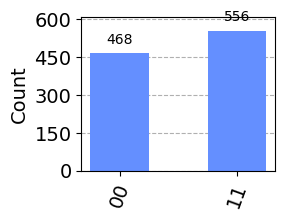

In [5]:
num_shots = 1024

# Create the simulator and run one time
backend_sim = BasicAer.get_backend('qasm_simulator')
job_sim = execute(circ, backend_sim, shots=num_shots, memory=True)
result_sim = job_sim.result().get_memory(circ)

plot_histogram(job_sim.result().get_counts(circ), figsize=(2.5,2))

### Type 2: $\frac{\ket{00}-\ket{11}}{\sqrt{2}}$

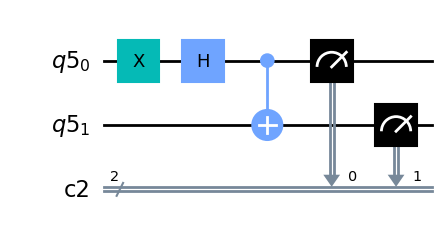

In [6]:
# Create the quantum registers and classical registers for measurement
q = QuantumRegister(2)
c = ClassicalRegister(2)

# Create the circuit with all registers
circ = QuantumCircuit(q, c)
circ.x(0)
circ.h(0)
circ.cx(0, 1)

# Measure all qubits and put the result in the classical registers
for i in range(2):
    circ.measure(q[i], c[i])

circ.draw('mpl')

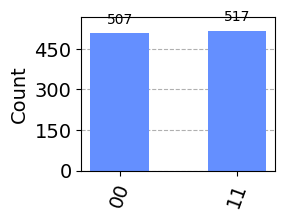

In [7]:
num_shots = 1024

# Create the simulator and run one time
backend_sim = BasicAer.get_backend('qasm_simulator')
job_sim = execute(circ, backend_sim, shots=num_shots, memory=True)
result_sim = job_sim.result().get_memory(circ)

plot_histogram(job_sim.result().get_counts(circ), figsize=(2.5,2))

### Type 3: $\frac{\ket{01}+\ket{10}}{\sqrt{2}}$

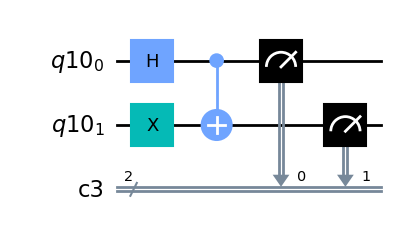

In [8]:
# Create the quantum registers and classical registers for measurement
q = QuantumRegister(2)
c = ClassicalRegister(2)

# Create the circuit with all registers
circ = QuantumCircuit(q, c)
circ.h(0)
circ.x(1)
circ.cx(0, 1)

# Measure all qubits and put the result in the classical registers
for i in range(2):
    circ.measure(q[i], c[i])

circ.draw('mpl')

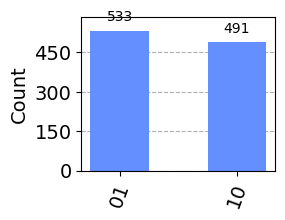

In [9]:
num_shots = 1024

# Create the simulator and run one time
backend_sim = BasicAer.get_backend('qasm_simulator')
job_sim = execute(circ, backend_sim, shots=num_shots, memory=True)
result_sim = job_sim.result().get_memory(circ)

plot_histogram(job_sim.result().get_counts(circ), figsize=(2.5,2))

### Type 4: $\frac{\ket{01}-\ket{10}}{\sqrt{2}}$

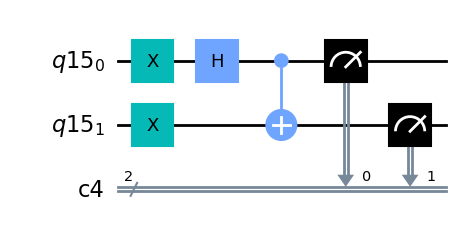

In [10]:
# Create the quantum registers and classical registers for measurement
q = QuantumRegister(2)
c = ClassicalRegister(2)

# Create the circuit with all registers
circ = QuantumCircuit(q, c)
circ.x(0)
circ.h(0)
circ.x(1)
circ.cx(0, 1)

# Measure all qubits and put the result in the classical registers
for i in range(2):
    circ.measure(q[i], c[i])

circ.draw('mpl')

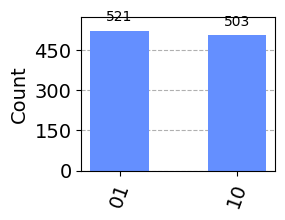

In [11]:
num_shots = 1024

# Create the simulator and run one time
backend_sim = BasicAer.get_backend('qasm_simulator')
job_sim = execute(circ, backend_sim, shots=num_shots, memory=True)
result_sim = job_sim.result().get_memory(circ)

plot_histogram(job_sim.result().get_counts(circ), figsize=(2.5,2))

## $n$-qubit GHZ state (take $n=3$ as example)

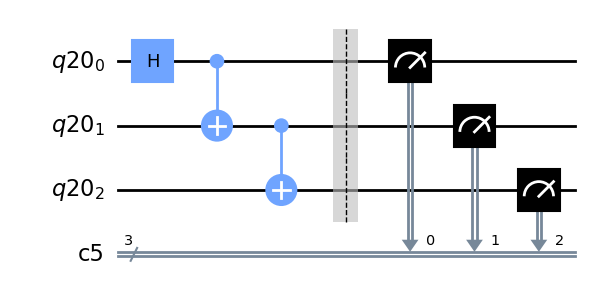

In [12]:
size = 3

# Create the quantum registers and classical registers for measurement
q = QuantumRegister(size)
c = ClassicalRegister(size)

# Create the circuit with all registers
circ = QuantumCircuit(q, c)
circ.h(0)
for i in range(size-1):
    circ.cx(i, i + 1)

circ.barrier()

# Measure all qubits and put the result in the classical registers
for i in range(size):
    circ.measure(q[i], c[i])

circ.draw('mpl')

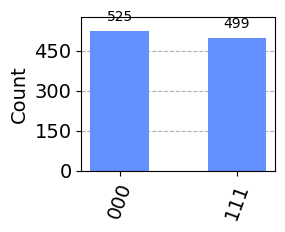

In [13]:
num_shots = 1024

# Create the simulator and run one time
backend_sim = BasicAer.get_backend('qasm_simulator')
job_sim = execute(circ, backend_sim, shots=num_shots, memory=True)
result_sim = job_sim.result().get_memory(circ)

plot_histogram(job_sim.result().get_counts(circ), figsize=(2.5,2))

## 3-qubit GHZ Leader Election (failure-free)

2


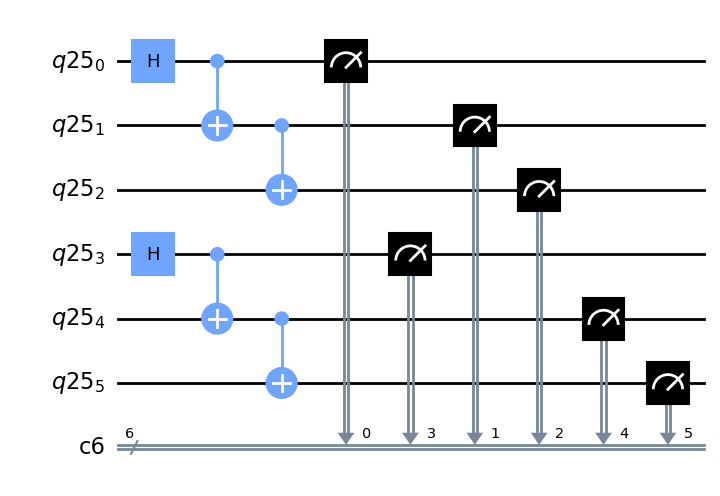

In [14]:
size = 3

num_of_pairs = int(np.ceil(np.log2(size)))
print(num_of_pairs)

# Create the quantum registers and classical registers for measurement
q = QuantumRegister(size*num_of_pairs)
c = ClassicalRegister(size*num_of_pairs)

# Create the circuit with all registers
circ = QuantumCircuit(q, c)
for i in range(num_of_pairs):
    circ.h(i * size)
    for j in range(size-1):
        circ.cx(j + i * size, j + 1 + i * size)

# Measure all qubits and put the result in the classical registers
for i in range(size * num_of_pairs):
    circ.measure(q[i], c[i])

circ.draw('mpl')

Leader has identifier 1


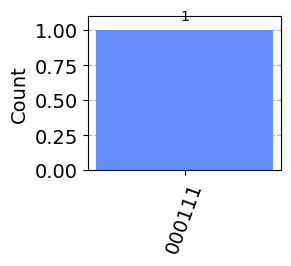

In [15]:
num_shots = 1

# Create the simulator and run one time
backend_sim = BasicAer.get_backend('qasm_simulator')
job_sim = execute(circ, backend_sim, shots=num_shots, memory=True)
result_sim = job_sim.result().get_memory(circ)

result = result_sim[0]

def calculate_id(c):
    s = 0
    for i in range(num_of_pairs):
        s = s * 2 + int(result[i*size])
    sys.stdout.write("Leader has identifier " + str(s))
    return s

while (calculate_id(c) + 1 > size):
    sys.stdout.write(" -> Leader identifier exceeds size, re-elect\n")
    # Create the quantum registers and classical registers for measurement
    q = QuantumRegister(size*num_of_pairs)
    c = ClassicalRegister(size*num_of_pairs)

    # Create the circuit with all registers
    circ = QuantumCircuit(q, c)
    for i in range(num_of_pairs):
        circ.h(i * size)
        for j in range(size-1):
            circ.cx(j + i * size, j + 1 + i * size)

    # Measure all qubits and put the result in the classical registers
    for i in range(size * num_of_pairs):
        circ.measure(q[i], c[i])

    backend_sim = BasicAer.get_backend('qasm_simulator')
    job_sim = execute(circ, backend_sim, shots=num_shots, memory=True)
    result_sim = job_sim.result().get_memory(circ)

    result = result_sim[0]

sys.stdout.write("\n")
plot_histogram(job_sim.result().get_counts(circ), figsize=(2.5,2))

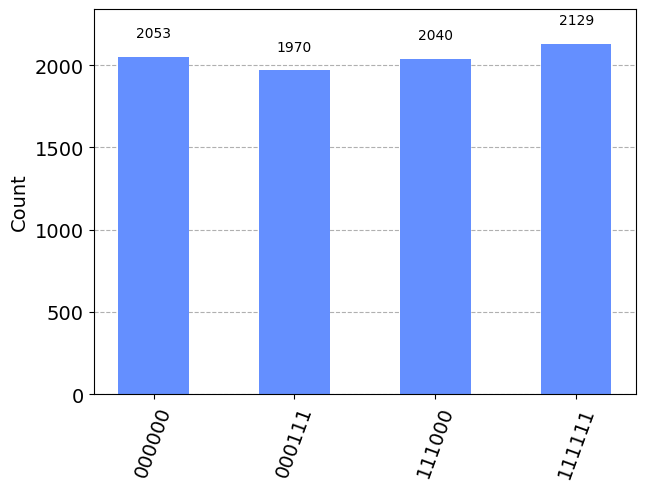

In [16]:
num_shots = 8192

# Create the simulator and run one time
backend_sim = BasicAer.get_backend('qasm_simulator')
job_sim = execute(circ, backend_sim, shots=num_shots, memory=True)
result_sim = job_sim.result().get_memory(circ)

plot_histogram(job_sim.result().get_counts(circ))

## Notes for GHZ Leader Election

- Each node in the network has a unique identifer, and can be mapped to $[n-1]$ by some means.
- Since each $GHZ$ state collapses to the same result upon measurement, $ceil(\log{n})$ pairs of entanglement are needed for identification purposes, which can be resource consuming.
- Upon measurement, every node knows the ID of the leader -- no additional communication needed.
- This algorithm is asymmetric, as `Node 1` involves an $H$ gate, while the rest don't.
- Situations when $n\neq 2^k$ need to be handled.
- It is possible to add new nodes before `Node n` (at the bottom) signals `Node 1` that the entanglement is complete and the circuit is now ready to be measured.
  - However it can be tricky if $ceil(\log{n+1})$ = $ceil(\log{n})$ + 1. A new pair of entanglement is needed.
- How should I think about the scenario where a node can crash / leave the network when it is already entangled?
  - add a time bound (heartbeat) to know that the one with $H$ gate is still alive.
  - the topology when electing the leader does not seem to matter, as long as the entanglement is generated in a unidirectional ring topology.
  - Will a crashed node affect the entanglement? If only the communication channels break it should be fine. And in GHZ entanglement it should not matter if a node is responsive as long as it measures.
- Two ways of disentangling qubits:
  - measure a entangled qubit, collapse all, and restart entanglement
  - use the inverse of gates to "rollback" operations (Recall that quantum gates are unitary operations which are reversible.)
- Do I care how to make a ring out of a graph?
- New positioning: in the existing literature, entanglement is assumed. Few looked at how entanglement should be distributed (other than having a third-party distributor, which is trivial).

## Next Steps

- Investigate non-local gates so that each register actually runs on a separate entity.
- Explore broadcast in Qiskit.
- Look at different ways of implementing $n$-qubit entanglement and see their implications for leader election.